# Polytope VS CacheB Benchmark

#### Import dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def mean_of_list(lst):
    return np.mean(lst)

sns.set_theme(style="ticks", palette="pastel")

## Infrastructure information
- Model: B3-16
- RAM: 16 GB
- Processor: 4 vCores
- Storage: 100 GiB
- Public bandwidth: 1000 Mbps


#### Polytope vs CacheB global DT-climate product

Polytope from request to data ready to use

![image info](/home/ubuntu/project/destination-earth-benchmark-dev/assets/polytope.jpg)


![image info](/home/ubuntu/project/destination-earth-benchmark-dev/assets/cacheB.jpg)


## DT-climate product standard resolution

In [2]:
dfc_standard = pd.read_json("results/cacheb_global_standard.json")
dfc_standard["service"] = "cacheB_global_standard"
dfp_standard = pd.read_json("results/polytope_global_standard.json")
dfp_standard["service"] = "polytope_global_standard"

In [3]:
dfp_standard

,download_time,transform_time,xarray_time,end_to_end_times,products_size,request_issues,service
0,7.430053,0.663889,0.559394,8.653336,2.764931,0,polytope_global_standard
1,5.346704,0.270724,0.005810,5.623239,2.764931,0,polytope_global_standard
2,4.847897,0.255085,0.005448,5.108430,2.764931,0,polytope_global_standard
3,3.715488,0.290000,0.005811,4.011299,2.764931,0,polytope_global_standard
4,5.273088,0.294330,0.005266,5.572684,2.764931,0,polytope_global_standard
...,...,...,...,...,...,...,...
95,5.390475,0.220766,0.005740,5.616981,2.764931,0,polytope_global_standard
96,4.927156,0.221928,0.005373,5.154458,2.764931,0,polytope_global_standard
97,5.059237,0.229861,0.005175,5.294273,2.764931,0,polytope_global_standard
98,4.649293,0.238426,0.005733,4.893453,2.764931,0,polytope_global_standard


In [4]:
dfc_standard

,access_time,data_select_time,download_time,end_to_end_times,pixel_number,products_size,issue_element,request_issues,service
0,2.164053,0.009378,4.723064,6.896495,524800,2.001953,NaN,0,cacheB_global_standard
1,1.773018,0.018560,4.506036,6.297614,524800,2.001953,NaN,0,cacheB_global_standard
2,1.692461,0.020109,4.727837,6.440406,524800,2.001953,NaN,0,cacheB_global_standard
3,1.834018,0.008624,4.534127,6.376769,524800,2.001953,NaN,0,cacheB_global_standard
4,1.734496,0.011630,4.955703,6.701829,524800,2.001953,NaN,0,cacheB_global_standard
...,...,...,...,...,...,...,...,...,...
95,1.730951,0.018943,5.839536,7.589430,524800,2.001953,NaN,0,cacheB_global_standard
96,1.732148,0.019012,4.601394,6.352555,524800,2.001953,NaN,0,cacheB_global_standard
97,1.919082,0.019056,4.886200,6.824338,524800,2.001953,NaN,0,cacheB_global_standard
98,1.946186,0.018148,4.603938,6.568272,524800,2.001953,NaN,0,cacheB_global_standard


### End to End benchmnark

The end-to-end benchmark refers to the time duration from performing a query to having the data in lat/lon grid and xarray format in the system memory, ready to be processed by the user.

For the benchmark, violin is used to compare distribution of the different services benchmark and summary of the data's central tendency, spread, and overall distribution in a compact and informative manner

A violin plot is a method of plotting numeric data and is used to visualize the distribution of the data. It combines elements of a box plot and a kernel density plot. Here’s a detailed explanation of its components and how it functions:

### Components of a Violin Plot
1. **Kernel Density Plot**: This forms the shape of the violin. The density plot is a smoothed version of the histogram, showing the probability density of the data at different values. It is plotted on both sides of a central axis, giving the plot a symmetric, violin-like shape.

2. **Box Plot Elements**: Inside the violin plot, a box plot can be included to provide summary statistics of the data, such as:
   - **Median**: The middle value of the data, typically marked by a white dot or line within the violin.
   - **Interquartile Range (IQR)**: The range between the first (25th percentile) and third quartiles (75th percentile), often shown as a thick bar.
   - **Whiskers**: Lines extending from the box, indicating the range of the data within 1.5 times the IQR from the first and third quartiles.
   - **Outliers**: Data points outside the whiskers, sometimes plotted individually.

### How to Read a Violin Plot
- **Width of the Violin**: The width at any given value indicates the density of the data at that value. Wider sections show where data points are more concentrated.
- **Symmetry**: Since the density plot is mirrored, it provides a clear visual comparison of the data's distribution on both sides of the central axis.
- **Comparative Analysis**: When multiple violins are plotted side by side (e.g., for different groups or categories), you can easily compare their distributions.

### Uses of a Violin Plot
- **Comparing Distributions**: Violin plots are particularly useful for comparing the distributions of several datasets.
- **Identifying Modes**: They can reveal multiple modes (peaks) in the data, indicating sub-populations within the dataset.
- **Summarizing Data**: They provide a .

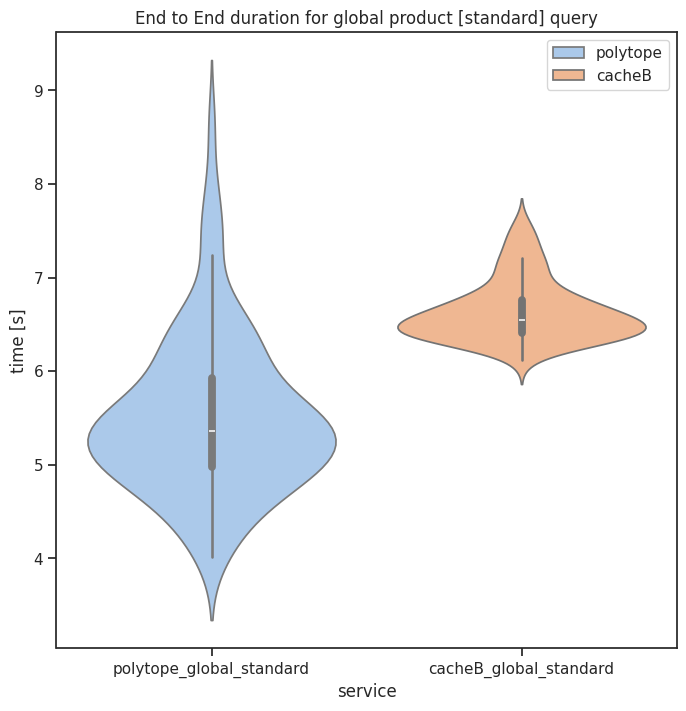

In [5]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
sns.violinplot(data=dfp_standard, y="end_to_end_times", x="service", label="polytope")
sns.violinplot(data=dfc_standard, y="end_to_end_times", x="service", label="cacheB")
plt.title("End to End duration for global product [standard] query")
plt.ylabel("time [s]")

plt.show()

In [6]:
polytope_mean = dfp_standard["end_to_end_times"].mean()
cacheB_mean = dfc_standard["end_to_end_times"].mean()
print(f" Polytope mean end to end: {polytope_mean}")
print(f" cacheB mean end to end: {cacheB_mean}")

 Polytope mean end to end: 5.512807416915893
 cacheB mean end to end: 6.638315949440003


In [7]:
polytope_failures = dfp_standard["request_issues"].sum()
cacheB_failures = dfc_standard["request_issues"][0]
print(f" Polytope total number of failure: {polytope_failures}")
print(f" cacheB total number of failure: {cacheB_failures}")

 Polytope total number of failure: 0
 cacheB total number of failure: 0


### Individual step benchmark

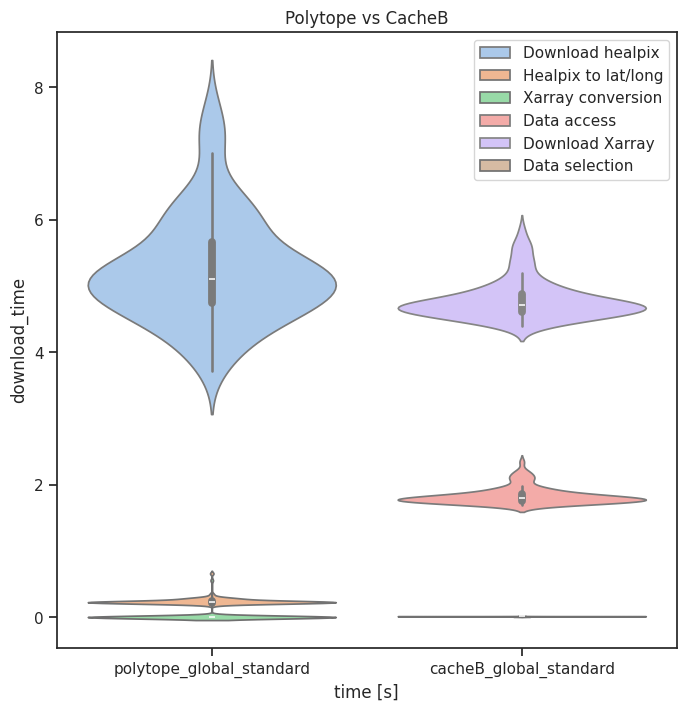

In [8]:
plt.figure(figsize=(8,8))
sns.violinplot(data=dfp_standard, y="download_time", x="service", label="Download healpix")
sns.violinplot(data=dfp_standard, y="transform_time", x="service", label="Healpix to lat/long")
sns.violinplot(data=dfp_standard, y="xarray_time", x="service", label="Xarray conversion")
sns.violinplot(data=dfc_standard, y="access_time", x="service",label="Data access")
sns.violinplot(data=dfc_standard, y="download_time", x="service",label="Download Xarray")
sns.violinplot(data=dfc_standard, y="data_select_time", x="service",label="Data selection")
plt.title("Polytope vs CacheB")
plt.xlabel("time [s]")
plt.show()

Comparaison of between healpix regriding to latitude/longitude (interpolate to a 0.3x0.3 degree lat-lon regular grid (in memory)) and data selection in the cacheB data cube

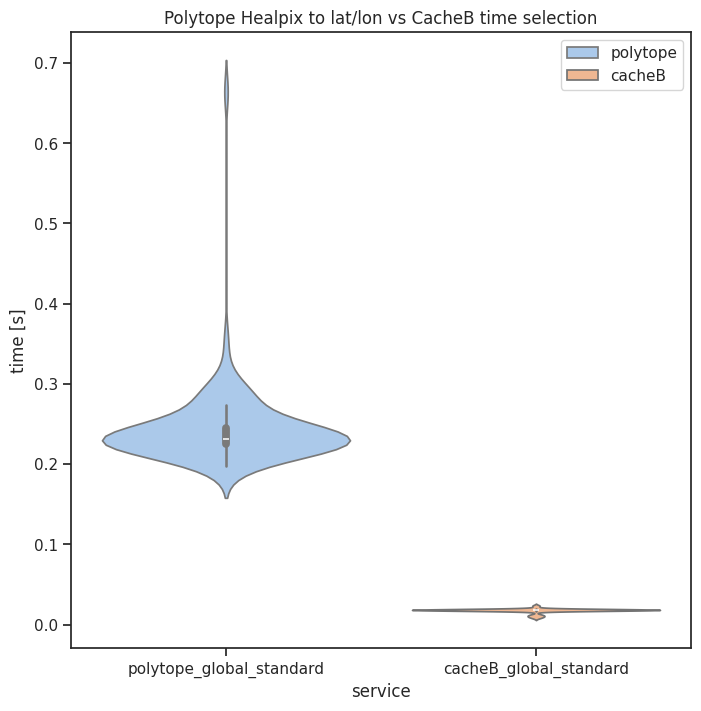

In [9]:
plt.figure(figsize=(8,8))
sns.violinplot(data=dfp_standard, y="transform_time", x="service", label="polytope")
sns.violinplot(data=dfc_standard, y="data_select_time", x="service",label="cacheB")
plt.title("Polytope Healpix to lat/lon vs CacheB time selection")
plt.ylabel("time [s]")
plt.show()

In [10]:
mean_transform = dfp_standard["transform_time"].mean()
std_transform = dfp_standard["transform_time"].std()
mean_select= dfc_standard["data_select_time"].mean()
std_select = dfc_standard["data_select_time"].std()
print(f"Polytope average Healpix transformation time: {mean_transform:.2f} ± {std_transform:.2f} seconds")
print(f"CacheB average selection time: {mean_select:.2f} ± {std_select:.3f} seconds")


Polytope average Healpix transformation time: 0.24 ± 0.05 seconds
CacheB average selection time: 0.02 ± 0.003 seconds


## DT-climate product high resolution

In [11]:
dfp_high = pd.read_json("results/polytope_global_high.json")
dfp_high["service"] = "polytope_global_high"

dfc_high = pd.read_json("results/cacheb_global_high.json")
dfc_high["service"] = "cacheB_global_high"

In [12]:
print(f"Average time {dfc_high.end_to_end_times.mean()}")
print(f"Average time {dfp_high.end_to_end_times.mean()}")

Average time 18.61490589618683
Average time 7.655098938941956


In [13]:
cacheB_failures = dfc_high["request_issues"][0]
print(f" cacheB total number of failure: {cacheB_failures}")

 cacheB total number of failure: 0


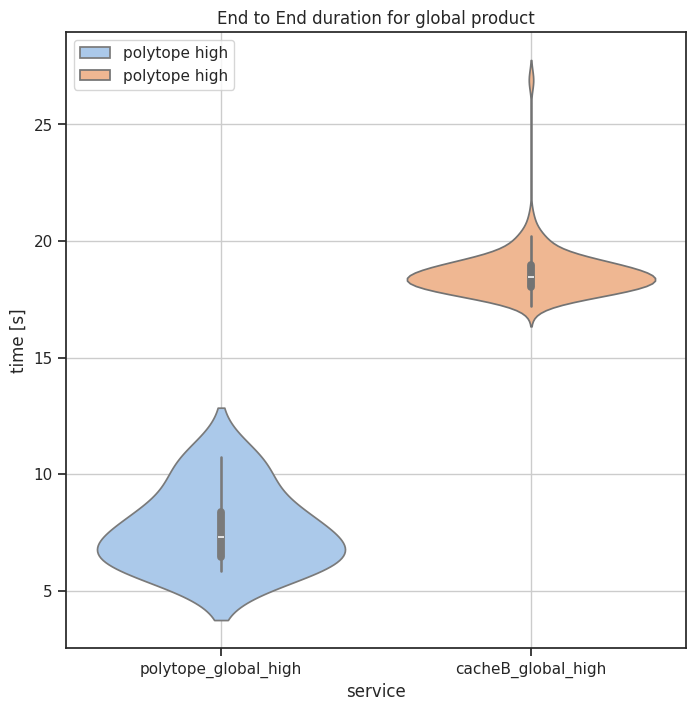

In [14]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
sns.violinplot(data=dfp_high, y="end_to_end_times", x="service", label="polytope high")
sns.violinplot(data=dfc_high, y="end_to_end_times", x="service", label="polytope high")
plt.title("End to End duration for global product")
plt.ylabel("time [s]")
plt.grid()
plt.show()

## DT-climate product standard resolution for ROI data exploitation

- numbers region of interest randombly generated: 200
- number of requests per roi: 10

In [15]:
dfc_roi_standard = pd.read_json("results/cacheb_roi_standard.json")
dfc_roi_standard = dfc_roi_standard.T
request_issues = dfc_roi_standard["request_issues"]
dfc_roi_standard = dfc_roi_standard[dfc_roi_standard.columns[:-1]]
dfc_roi_standard.head()

,access_time,data_select_time,download_time,end_to_end_times,pixel_number,products_size
0,"[2.194801092147827, 1.8233880996704102, 1.7863...","[0.023062229156494002, 0.019750118255615002, 0...","[3.349386692047119, 1.7556660175323482, 1.6850...","[5.56725001335144, 3.598804235458374, 3.479891...","[18000, 18000, 18000, 18000, 18000, 18000, 180...","[0.06866455078125, 0.06866455078125, 0.0686645..."
1,"[1.9491403102874751, 2.214400291442871, 2.0279...","[0.019233226776123002, 0.018607378005981, 0.01...","[2.49737548828125, 2.152183532714843, 2.477343...","[4.465749025344849, 4.385191202163696, 4.52429...","[64751, 64751, 64751, 64751, 64751, 64751, 647...","[0.24700546264648401, 0.24700546264648401, 0.2..."
2,"[1.80080771446228, 1.842024564743042, 1.800183...","[0.019465923309326002, 0.016000032424926, 0.01...","[1.5293593406677242, 1.490916967391967, 1.5045...","[3.349632978439331, 3.348941564559936, 3.32387...","[42120, 42120, 42120, 42120, 42120, 42120, 421...","[0.160675048828125, 0.160675048828125, 0.16067..."
3,"[1.725658655166626, 1.84163212776184, 1.794453...","[0.022508144378662002, 0.019908666610717003, 0...","[1.14940071105957, 1.131264925003051, 1.089761...","[2.897567510604858, 2.9928057193756104, 2.9034...","[18639, 18639, 18639, 18639, 18639, 18639, 186...","[0.071102142333984, 0.071102142333984, 0.07110..."
4,"[1.917454004287719, 1.9738726615905762, 1.9740...","[0.019226312637329, 0.019399404525756, 0.01964...","[1.523546457290649, 1.145043134689331, 1.09184...","[3.4602267742156982, 3.138315200805664, 3.0855...","[35020, 35020, 35020, 35020, 35020, 35020, 350...","[0.133590698242187, 0.133590698242187, 0.13359..."


In [16]:
# Apply the function to each cell of the DataFrame
mean_dfc_roi_standard = dfc_roi_standard.map(mean_of_list)
mean_dfc_roi_standard["request_issues"] = request_issues

In [17]:
mean_dfc_roi_standard.head()

,access_time,data_select_time,download_time,end_to_end_times,pixel_number,products_size,request_issues
0,1.869926,0.016534,1.954468,3.840928,18000.0,0.068665,0
1,1.909861,0.019457,1.976618,3.905935,64751.0,0.247005,0
2,1.789828,0.016090,1.528220,3.334138,42120.0,0.160675,0
3,1.778653,0.020302,1.171229,2.970183,18639.0,0.071102,0
4,1.857468,0.018670,1.161572,3.037710,35020.0,0.133591,0


In [18]:
mean_dfc_roi_standard["request_issues"].sum()

0

In [19]:
polytope_product_size = {'healpix_size': 0.450, 'end_to_end_times': dfp_standard["end_to_end_times"].mean(),
                         'xarray_size': dfp_standard["products_size"].mean(), 'transform_time': dfp_standard["transform_time"].mean()}

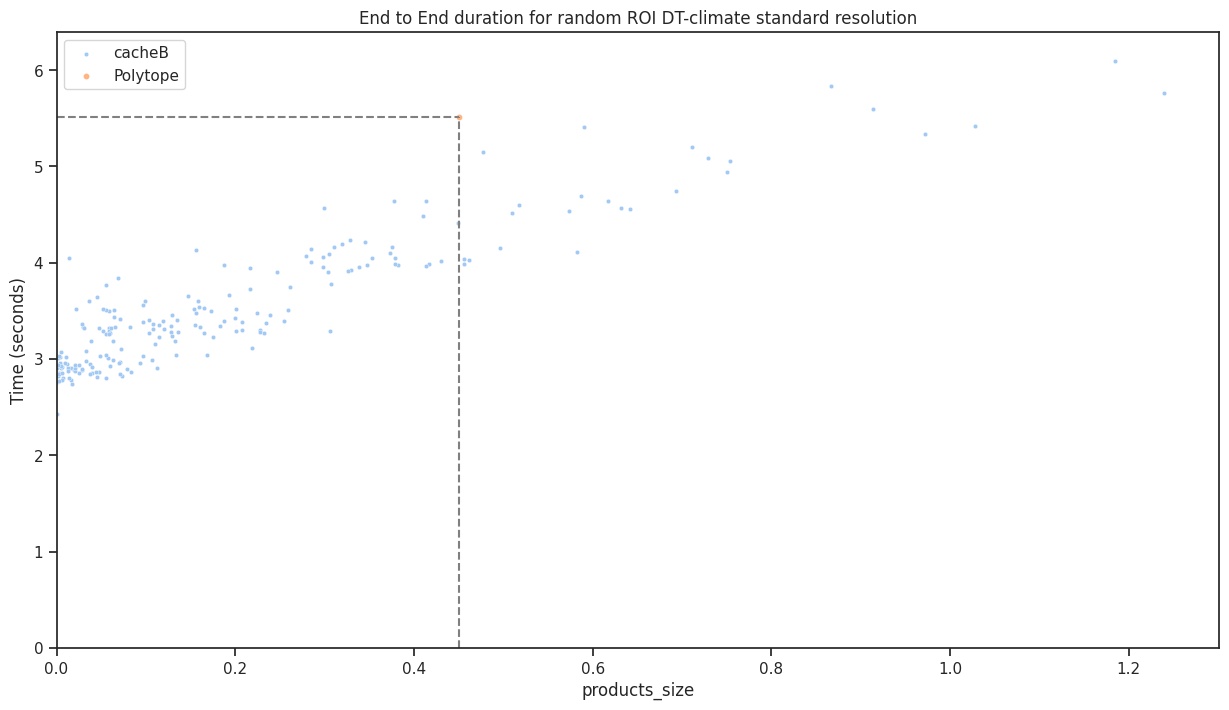

In [20]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.scatterplot(data=mean_dfc_roi_standard, x="products_size", y="end_to_end_times",label='cacheB',s=10)

plt.scatter(polytope_product_size['healpix_size'], polytope_product_size['end_to_end_times'], s=10, label='Polytope')
plt.plot([polytope_product_size['healpix_size'], polytope_product_size['healpix_size']], [0, polytope_product_size['end_to_end_times']], linestyle='--', color='gray')
plt.plot([0, polytope_product_size['healpix_size']], [polytope_product_size['end_to_end_times'], polytope_product_size['end_to_end_times']], linestyle='--', color='gray')

plt.title("End to End duration for random ROI DT-climate standard resolution")
plt.ylabel("Time (seconds)")
plt.xlim(mean_dfc_roi_standard["products_size"].min())
plt.ylim(0)
plt.legend()


plt.show()

## DT-climate product standard hight for ROI data exploitation

- numbers region of interest randombly generated: 200
- number of requests per roi: 10

In [21]:
dfc_roi_high = pd.read_json("results/cacheb_roi_high.json")
dfc_roi_high = dfc_roi_high.T
request_issues = dfc_roi_high["request_issues"]
dfc_roi_high = dfc_roi_high[dfc_roi_high.columns[:-1]]
dfc_roi_high.head()

,access_time,data_select_time,download_time,end_to_end_times,pixel_number,products_size
0,"[2.404719352722168, 2.369569778442383, 2.40419...","[0.020280599594116003, 0.019534349441528, 0.02...","[5.68573522567749, 3.8408279418945312, 4.29176...","[8.110735177993774, 6.229932069778442, 6.71693...","[3814950, 3814950, 3814950, 3814950, 3814950, ...","[14.552879333496094, 14.552879333496094, 14.55..."
1,"[2.566325426101684, 2.65766978263855, 2.458024...","[0.015580415725708001, 0.020391702651977, 0.02...","[4.14111852645874, 3.440080404281616, 4.060177...","[6.723024368286133, 6.118141889572143, 6.54315...","[3839996, 3839996, 3839996, 3839996, 3839996, ...","[14.648422241210938, 14.648422241210938, 14.64..."
2,"[2.594416856765747, 2.457512617111206, 2.79567...","[0.009886264801025, 0.014698266983032001, 0.01...","[5.056869268417358, 3.771622657775879, 3.27367...","[7.661172389984131, 6.243833541870117, 6.07983...","[1803400, 1803400, 1803400, 1803400, 1803400, ...","[6.879425048828125, 6.879425048828125, 6.87942..."
3,"[2.53148341178894, 2.465323448181152, 2.501913...","[0.010522127151489001, 0.020563840866088003, 0...","[8.794816493988037, 6.030433177947998, 5.92517...","[11.336822032928467, 8.51632046699524, 8.44855...","[5771205, 5771205, 5771205, 5771205, 5771205, ...","[22.015399932861328, 22.015399932861328, 22.01..."
4,"[2.54901385307312, 2.5396780967712402, 2.47837...","[0.015987396240234, 0.009996652603149001, 0.02...","[2.837023258209228, 2.747047901153564, 2.93952...","[5.402024507522583, 5.296722650527954, 5.43802...","[1482340, 1482340, 1482340, 1482340, 1482340, ...","[5.6546783447265625, 5.6546783447265625, 5.654..."


In [22]:
# Apply the function to each cell of the DataFrame
mean_dfc_roi_high = dfc_roi_high.map(mean_of_list)
mean_dfc_roi_high["request_issues"] = request_issues

In [23]:
mean_dfc_roi_high.head(10)

,access_time,data_select_time,download_time,end_to_end_times,pixel_number,products_size,request_issues
0,2.595205,0.018192,4.436835,7.050231,3814950.0,14.552879,0
1,2.501788,0.015249,3.588542,6.105579,3839996.0,14.648422,0
2,2.527349,0.017512,3.139839,5.684700,1803400.0,6.879425,0
3,2.513458,0.017724,6.358717,8.889899,5771205.0,22.015400,0
4,2.444222,0.015555,2.768475,5.228252,1482340.0,5.654678,0
5,2.489700,0.013039,3.350684,5.853423,2833764.0,10.809952,0
6,2.490275,0.020160,5.559184,8.069619,6095520.0,23.252563,0
7,2.492084,0.019583,3.930706,6.442373,296482.0,1.130989,0
8,2.468760,0.019608,7.989619,10.477988,13047951.0,49.773983,0
9,2.482313,0.011312,2.337081,4.830706,1305015.0,4.978237,0


In [24]:
cacheB_failures = mean_dfc_roi_high["request_issues"].sum()
print(f" cacheB total number of failure: {cacheB_failures}")

 cacheB total number of failure: 0


In [25]:
polytope_product_size = {'healpix_size': 25, 'end_to_end_times': dfp_high["end_to_end_times"].mean(),
                         'xarray_size': dfp_high["products_size"].mean(), 'end_to_end_times': dfp_high["end_to_end_times"].mean()}

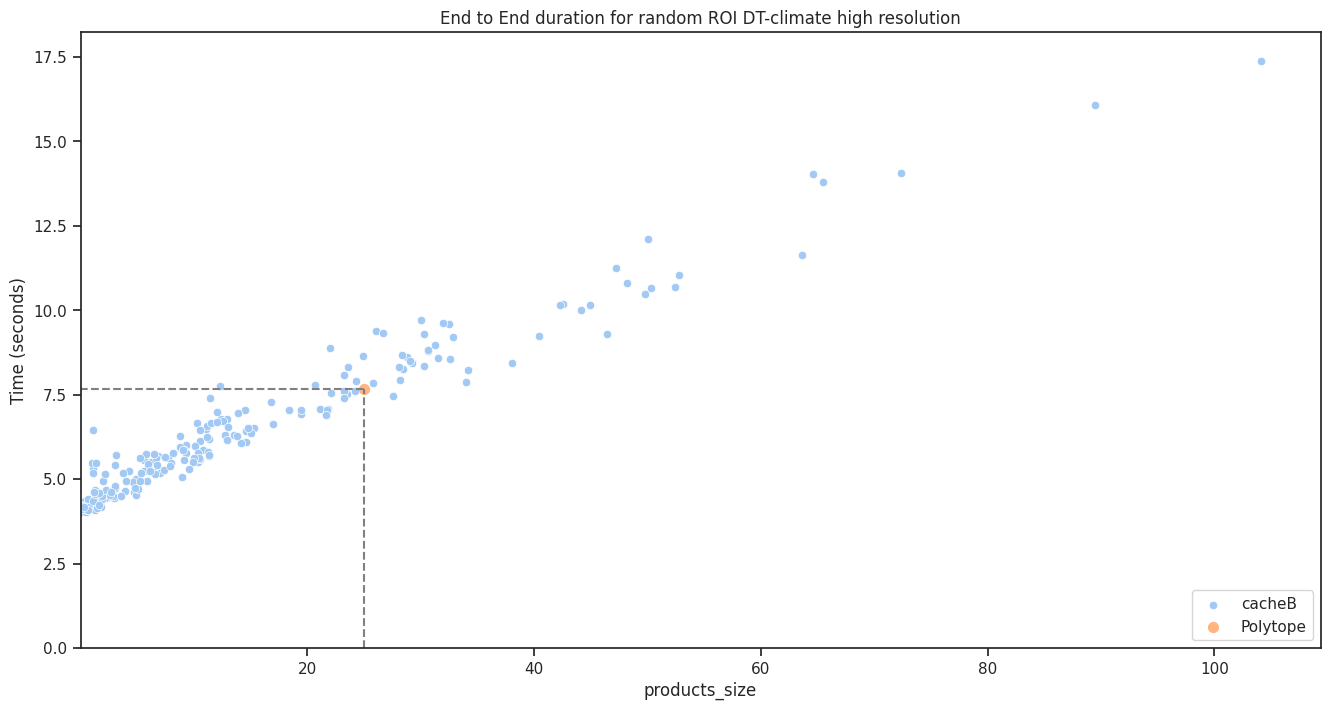

In [26]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(16,8))
sns.scatterplot(data=mean_dfc_roi_high, x="products_size", y="end_to_end_times", label='cacheB')

plt.scatter(polytope_product_size['healpix_size'], polytope_product_size['end_to_end_times'], s=50, label='Polytope')
plt.plot([polytope_product_size['healpix_size'], polytope_product_size['healpix_size']], [0, polytope_product_size['end_to_end_times']], linestyle='--', color='gray')
plt.plot([0, polytope_product_size['healpix_size']], [polytope_product_size['end_to_end_times'], polytope_product_size['end_to_end_times']], linestyle='--', color='gray')

plt.title("End to End duration for random ROI DT-climate high resolution")
plt.ylabel("Time (seconds)")

plt.xlim(mean_dfc_roi_high["products_size"].min())
plt.ylim(0)
plt.legend(loc='lower right')
plt.show()

## All results

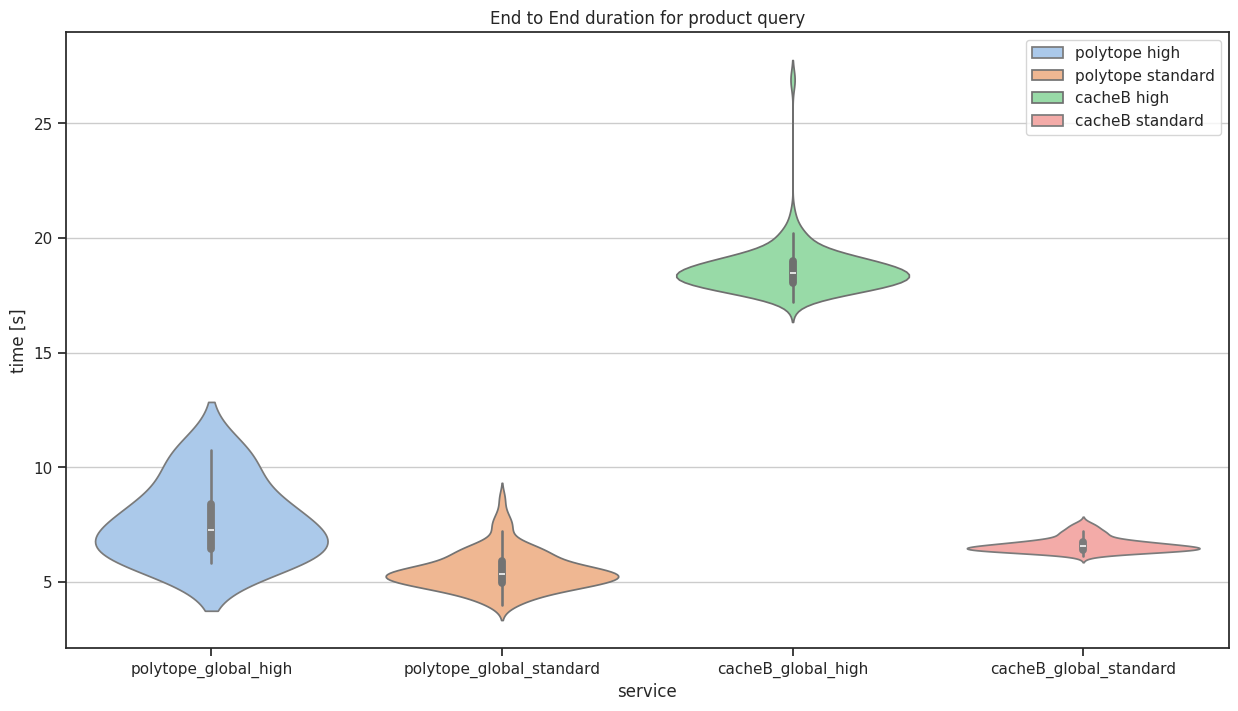

In [27]:
plt.figure(figsize=(15,8))
plt.grid()
sns.violinplot(data=dfp_high, y="end_to_end_times", x="service", label="polytope high")
sns.violinplot(data=dfp_standard, y="end_to_end_times", x="service", label="polytope standard")
sns.violinplot(data=dfc_high, y="end_to_end_times", x="service", label="cacheB high")
sns.violinplot(data=dfc_standard, y="end_to_end_times", x="service", label="cacheB standard")
plt.title("End to End duration for product query")
plt.ylabel("time [s]")
plt.show()